In [2]:
#Step 1: recieve an observation
import gym


env = gym.make('CartPole-v1')

PARAM_episode_max_length = 100

observation = env.reset()

# for t in range(PARAM_episode_max_length):

observation

(array([ 0.03998628, -0.04274393, -0.00119471,  0.00502334], dtype=float32),
 {})

In [2]:
#Step 2: run an episode of environment
import gym


env = gym.make('CartPole-v1', render_mode='human')

PARAM_episode_max_length = 100

observation = env.reset()

for t in range(PARAM_episode_max_length):
    random_action = env.action_space.sample()
    observation, reward, is_terminated, is_truncated, step_info = env.step(random_action)

env.close()

In [3]:
env.observation_space.shape

(4,)

In [18]:
#Step 3: Define, Implement the state space of the Q Algorithm

#The state space is a superset of the observation spae

#observations consists of 4 continuous components

#There is no way I can think of to implement a continuous state space
# without discretizing it, and thus states within the state space 
# of the  Q-learning algorithm will be represented by ranges.
import gym, math


env = gym.make('CartPole-v1')

# Run 1000 episodes to determine observed boundary values for each component 
PARAM_number_of_episodes = 1000
PARAM_episode_max_length = 1000

state_space_num_components = env.observation_space.shape[0]

class state_space_representation:
    def __init__(self, num_components):
        self.num_components = num_components
        self.min_max_bounds = [[float('inf'), float('-inf')] for i in range(self.num_components)]
        self.repr_created = False

    def update(self, observation):
        #dont update if repr_created
        assert not (self.repr_created == True)

        for i in range(self.num_components):
            if observation[i] < self.min_max_bounds[i][0]:
                self.min_max_bounds[i][0] = observation[i]
            if observation[i] > self.min_max_bounds[i][1]:
                self.min_max_bounds[i][1] = observation[i]
        return

    def create_state_space_repr(self):
        #The state space is represented as a partition
        # of interval (-inf, inf) into a number of 
        # subintervals.
        # The number of intervals, and the size of 
        # each interval is determined by the length of the
        # difference of the most extreme observed values of
        # each component of the observation space.
        self.state_space_component_partitions  = []

        #The larger this number, the more elements will exist
        # within the partition of each state space component.
        self.state_space_component_complexitity_multiplier = 4
        self.ssccm = self.state_space_component_complexitity_multiplier

        for i in range(self.num_components):
            #Given that this code was written for the cartpole environment,
            # the intervals of each component of the cartpole observation space 
            # are all larger than 1.
            # Thus the number of elements in each partition will always al least
            # at least the ssccm. 
            number_of_elements_in_partition = math.ceil(50)
            low, high = self.min_max_bounds[i]

            partition = [(-1 * float('inf'), low) ]
            
            interval_step_size = self.interval_lengths[i] / number_of_elements_in_partition 

            for j in range(number_of_elements_in_partition):
                interval_low = low + (j * interval_step_size)
                interval_high = low + ((j + 1) * interval_step_size)
                interval = (interval_low, interval_high)
                partition.append(interval)

            #Should be true, but a guarantee was not proven  
            assert (len(partition) > 0)
            
            print((partition[-1][1], high, partition[-1][1] - high))

            partition.append((partition[-1][1], float('inf')))
            self.state_space_component_partitions.append(partition)
        return

    def finalize(self):
        self.repr_created = True
        self.interval_lengths = [self.min_max_bounds[i][1] - self.min_max_bounds[i][0] for i in range(self.num_components)]
        self.create_state_space_repr()
        return 
    
    


In [19]:
import gym, math


env = gym.make('CartPole-v1')

# Run 1000 episodes to determine observed boundary values for each component 
PARAM_number_of_episodes = 1000
PARAM_episode_max_length = 1000

state_space_num_components = env.observation_space.shape[0]

state_space_repr = state_space_representation(state_space_num_components)

for episode in range(PARAM_number_of_episodes):
    observation, _ = env.reset()
    state_space_repr.update(observation)

    for t in range(PARAM_episode_max_length):
        random_action = env.action_space.sample()
        observation, reward, terminate_episode_signal, _, step_info = env.step(random_action)
        state_space_repr.update(observation)
        
        if terminate_episode_signal:
            break


state_space_repr.finalize()

(1.7881668210029602, 1.7881668, 5.960464477539063e-08)
(2.2610435485839844, 2.2610435, 0.0)
(0.2554192543029785, 0.25541925, 0.0)
(2.9192378520965576, 2.9192379, 0.0)


In [3]:
#Step 3: Define, Implement the state space of the Q Algorithm

#The state space is a superset of the observation spae

#observations consists of 4 continuous components

#There is no way I can think of to implement a continuous state space
# without discretizing it, and thus states within the state space 
# of the  Q-learning algorithm will be represented by ranges.
import gym


env = gym.make('CartPole-v1')

# Run 1000 episodes to determine observed boundary values for each component 
PARAM_number_of_episodes = 1000
PARAM_episode_max_length = 1000

state_space_num_components = env.observation_space.shape[0]

#(min, max) observed for each component 
state_space_repr_obj = [[float('inf'), float('-inf')] for i in range(state_space_num_components)]



episode_length_history = []

for episode in range(PARAM_number_of_episodes):
    observation, _ = env.reset()
    
    for i in range(state_space_num_components):
        if observation[i] < state_space_repr_obj[i][0]:
            state_space_repr_obj[i][0] = observation[i]
        if observation[i] > state_space_repr_obj[i][1]:
            state_space_repr_obj[i][1] = observation[i]


    terminated_at_counter = 0 

    for t in range(PARAM_episode_max_length):
        random_action = env.action_space.sample()
        observation, reward, terminate_episode_signal, _, step_info = env.step(random_action)

        for i in range(state_space_num_components):
            if observation[i] < state_space_repr_obj[i][0]:
                state_space_repr_obj[i][0] = observation[i]
            if observation[i] > state_space_repr_obj[i][1]:
                state_space_repr_obj[i][1] = observation[i]

        if not (terminate_episode_signal):
            terminated_at_counter += 1
        else:
            break

    episode_length_history.append(terminated_at_counter)

# len(observations)

# observed_bounds = []
state_space_repr_obj
# for i in range(state_space_num_components):
#     observed_min = min(observations, key=lambda x: x[i])[i]
#     observed_max = max(observations, key=lambda x: x[i])[i]
#     observed_bounds.append((observed_min, observed_max))

# observed_bounds, sum(episode_length_history)/len(episode_length_history)

[[-2.4893837, 2.4896784],
 [-5.4872537, 5.069546],
 [-100.3937, 116.41859],
 [-17.804838, 19.29232]]

In [4]:
interval_lengths = [(high - low) for low, high in observed_bounds]
interval_lengths

[4.96159, 9.648396, 252.36862, 38.21286]

In [24]:
#Divide each component into n times the interval length
import math

state_space_component_partitions  = []

#The larger this number, the more elements will exist
# within the partition of each state space component.
state_space_component_complexitity_multiplier = 4
ssccm = state_space_component_complexitity_multiplier

for i in range(len(interval_lengths)):
    #Given that this code was written for the cartpole environment,
    #the intervals of each component of the cartpole obs. space are all larger
    # than 1.
    # Thus the number of elements in each partition will always al least
    # at least the ssccm. 
    number_of_elements_in_partition = math.ceil(interval_lengths[i] * ssccm)
    low, high = observed_bounds[i]

    partition = [(-1 * float('inf'), low) ]
    
    interval_step_size = interval_lengths[i] / number_of_elements_in_partition 

    for j in range(number_of_elements_in_partition):
        interval_low = low + (j * interval_step_size)
        interval_high = low + ((j + 1) * interval_step_size)
        interval = (interval_low, interval_high)
        partition.append(interval)

    #Should be true, but a guarantee was not proven  
    assert (len(partition) > 0)
    
    print((partition[-1][1], high, partition[-1][1] - high))

    partition.append((partition[-1][1], float('inf')))
    state_space_component_partitions.append(partition)

state_space_component_partitions[0]


(2.481074810028076, 2.4810748, 0.0)
(4.868475914001465, 4.8684754, 4.76837158203125e-07)
(112.92225646972656, 112.92225, 7.62939453125e-06)
(18.531221389770508, 18.531221, 0.0)


[(-inf, -2.480515),
 (-2.4805150032043457, -2.2324355125427244),
 (-2.2324355125427244, -1.9843560218811036),
 (-1.9843560218811036, -1.7362765312194823),
 (-1.7362765312194823, -1.4881970405578613),
 (-1.4881970405578613, -1.2401175498962402),
 (-1.2401175498962402, -0.992038059234619),
 (-0.992038059234619, -0.7439585685729979),
 (-0.7439585685729979, -0.49587907791137686),
 (-0.49587907791137686, -0.2477995872497556),
 (-0.2477995872497556, 0.0002799034118652344),
 (0.0002799034118652344, 0.2483593940734865),
 (0.2483593940734865, 0.4964388847351078),
 (0.4964388847351078, 0.7445183753967286),
 (0.7445183753967286, 0.9925978660583499),
 (0.9925978660583499, 1.2406773567199707),
 (1.2406773567199707, 1.488756847381592),
 (1.488756847381592, 1.7368363380432132),
 (1.7368363380432132, 1.9849158287048345),
 (1.9849158287048345, 2.232995319366455),
 (2.232995319366455, 2.481074810028076),
 (2.481074810028076, inf)]

In [25]:
[len(partition) for partition in state_space_component_partitions]

[22, 41, 1012, 155]

In [20]:
[len(partition) for partition in state_space_repr.state_space_component_partitions]

[52, 52, 52, 52]

In [26]:
g = 0
for i in range(144400000):
    g += 1

In [21]:
import random

class Q:
    def __init__(self, state_space_repr, action_space_repr, learning_rate, discount_factor, epsilon):
        self.state_space_repr = state_space_repr
        self.action_space_repr = action_space_repr
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_init_value = random.random
        self.q_table = {}
        self.state_lookup_misses = 0
        # self.delta_history = []
        return

    def map_observation_to_repr(self, observation):
        #Given an observation, return the state space representation
        # that it belongs to.
        assert (len(observation) == self.state_space_repr.num_components)
        repr = []

        for i in range(self.state_space_repr.num_components):
            for j in range(len(self.state_space_repr.state_space_component_partitions[i])):
                low, high = self.state_space_repr.state_space_component_partitions[i][j]
                if observation[i] >= low and observation[i] < high:
                    repr.append(j)
                    break
        repr = tuple(repr)


        return repr

    def best_action(self, observation):
        repr = self.map_observation_to_repr(observation)
        if repr not in self.q_table:
            self.state_lookup_misses += 1
            #place current state in table
            self.q_table[repr] = {i:self.q_init_value() for i in range(self.action_space_repr.n)}
        
        if random.random() <= self.epsilon:
            return self.action_space_repr.sample()

        all_action_values_equal = True
        best_action = 0
        best_value = self.q_init_value()
        
        for action in self.q_table[repr]:
            value = self.q_table[repr][action] 
            if (value > best_value):
                all_action_values_equal = False
                best_action = action
                best_value = value

        if all_action_values_equal:
            return self.action_space_repr.sample()
        else:
            return best_action
    
    def update(self, observation, action, reward, next_observation):
        repr = self.map_observation_to_repr(observation)
        next_repr = self.map_observation_to_repr(next_observation)

        if repr not in self.q_table:
            #place current state in table
            self.state_lookup_misses += 1
            self.q_table[repr] = {i:self.q_init_value() for i in range(self.action_space_repr.n)}

        if next_repr not in self.q_table:
            #place next state in table
            self.state_lookup_misses += 1
            self.q_table[next_repr] = {i:self.q_init_value() for i in range(self.action_space_repr.n)}

        
        #update q value
        old_value = self.q_table[repr][action]
        current_value_information = (1 - self.learning_rate) * self.q_table[repr][action]
        temporal_diff_target = self.learning_rate * (reward + self.discount_factor * max(self.q_table[next_repr].values()) )
        self.q_table[repr][action] = current_value_information + temporal_diff_target  

        # delta = self.q_table[repr][action] - old_value
        # print( (old_value, self.q_table[repr][action], delta, temporal_diff_target), sep="", end=" " )
        # self.delta_history.append(delta)
        return

In [93]:
tab1 = list(q.q_table.items())
tab2 = []

for i in range(len(tab1)):
    row = (tab1[i][0], tab1[i][1][0] + tab1[i][1][1])
    tab2.append(row)

tab2.sort(key=lambda x: x[1], reverse=True)

tab2

[((4, 5, 6, 5), 4250.357489200609),
 ((4, 5, 5, 5), 4243.199884985464),
 ((4, 5, 6, 4), 4237.128761175429),
 ((5, 3, 3, 6), 4222.237872939256),
 ((5, 3, 4, 5), 4198.072026727994),
 ((5, 3, 4, 6), 4196.145722717805),
 ((4, 3, 5, 5), 4161.517506730632),
 ((5, 5, 6, 4), 4109.593270401075),
 ((4, 6, 6, 4), 4103.985301935076),
 ((4, 4, 6, 4), 4087.708889855838),
 ((5, 3, 5, 5), 4079.5077979749244),
 ((5, 3, 5, 6), 4031.940915979575),
 ((5, 4, 5, 6), 4029.716084697953),
 ((5, 3, 2, 6), 4010.6161385720998),
 ((5, 4, 2, 5), 3960.6635095291754),
 ((4, 4, 5, 6), 3957.7767963357855),
 ((4, 5, 7, 4), 3956.1591869885233),
 ((5, 6, 5, 4), 3943.355129578658),
 ((4, 6, 5, 4), 3941.3694383266948),
 ((4, 6, 5, 3), 3922.677657652347),
 ((5, 3, 2, 5), 3920.317159449485),
 ((5, 4, 6, 5), 3876.630436694008),
 ((5, 5, 5, 5), 3873.7748469073213),
 ((4, 5, 5, 3), 3857.5182705598218),
 ((5, 6, 5, 3), 3850.544653455013),
 ((4, 5, 4, 3), 3828.663972132353),
 ((5, 5, 6, 5), 3825.0145172459343),
 ((5, 4, 4, 6), 381

In [2]:
import pickle 
table = {}
with open('q_table72120231708.pkl', 'rb') as f:
    table = pickle.load(f)

In [7]:
mean_reward_per_session = []

In [45]:
# Step 5: Run Algorithm, Achieve Convergence
# Code should take in an (observation, action), determine the 
# bounding interval for the observation.
# If a state has not been accessed before, it's 
# pre-updated Q value is 0.
env = gym.make('CartPole-v1', render_mode='human')

# Run 1000 episodes to determine observed boundary values for each component 
PARAM_number_of_episodes = 100
PARAM_episode_max_length = 1000

PARAM_learning_rate = 0.8
PARAM_discount_factor = 0.8

table = q.q_table

q = Q(
    state_space_repr=state_space_repr, 
    action_space_repr=env.action_space, 
    learning_rate=PARAM_learning_rate, 
    discount_factor=PARAM_discount_factor,
    epsilon=0.2,
    # q_init_value=0
)

q.q_table = table

import pickle 

with open('q-table_s50.pkl', 'wb') as f:
    pickle.dump(q.q_table, f)


In [52]:
# Step 5: Run Algorithm, Achieve Convergence
# Code should take in an (observation, action), determine the 
# bounding interval for the observation.
# If a state has not been accessed before, it's 
# pre-updated Q value is 0.
import gym

env = gym.make('CartPole-v1')

PARAM_number_of_episodes = 10000
PARAM_episode_max_length = 1000

PARAM_learning_rate = 0.98
PARAM_discount_factor = 0.995

table = q.q_table


q = Q(
    state_space_repr=state_space_repr, 
    action_space_repr=env.action_space, 
    learning_rate=PARAM_learning_rate, 
    discount_factor=PARAM_discount_factor,
    epsilon=0.9,
    # q_init_value=0
)

q.q_table = table

import pickle 

with open('q-table_s50.pkl', 'wb') as f:
    pickle.dump(q.q_table, f)

In [53]:
reward_history = []

for episode in range(PARAM_number_of_episodes):
    observation, _ = env.reset()

    episode_reward = 0
    misses_at_start = q.state_lookup_misses
    for t in range(PARAM_episode_max_length):
        env.render()
        action = q.best_action(observation)
        next_observation, reward, terminate_episode_signal, _, step_info = env.step(action)
        q.update(observation, action, reward + t, next_observation)
        
        episode_reward += reward
        observation = next_observation

        if terminate_episode_signal:
            break
    
    reward_history.append(episode_reward)

    misses_during_episode = q.state_lookup_misses - misses_at_start
    episodes_left = PARAM_number_of_episodes - episode - 1
    exp_info = (episodes_left, len(q.q_table), misses_during_episode, episode_reward) 
    print(exp_info)

env.close()

import numpy as np
import win32api


session_reward = np.mean(reward_history)
mean_reward_per_session.append(session_reward)


win32api.MessageBox(0, 'Done', 'DoneMessage', 0x00001000) 

mean_reward_per_session

(9999, 50783, 0, 14.0)
(9998, 50791, 8, 45.0)
(9997, 50791, 0, 20.0)
(9996, 50791, 0, 33.0)
(9995, 50791, 0, 24.0)
(9994, 50805, 14, 42.0)
(9993, 50805, 0, 22.0)
(9992, 50805, 0, 24.0)
(9991, 50805, 0, 22.0)
(9990, 50805, 0, 17.0)
(9989, 50805, 0, 26.0)
(9988, 50805, 0, 39.0)
(9987, 50810, 5, 40.0)
(9986, 50817, 7, 34.0)
(9985, 50817, 0, 21.0)
(9984, 50817, 0, 11.0)
(9983, 50817, 0, 22.0)
(9982, 50817, 0, 18.0)
(9981, 50817, 0, 27.0)
(9980, 50817, 0, 25.0)
(9979, 50817, 0, 27.0)
(9978, 50817, 0, 17.0)
(9977, 50817, 0, 30.0)
(9976, 50817, 0, 13.0)
(9975, 50817, 0, 12.0)
(9974, 50817, 0, 31.0)
(9973, 50817, 0, 15.0)
(9972, 50817, 0, 18.0)
(9971, 50817, 0, 27.0)
(9970, 50817, 0, 21.0)
(9969, 50817, 0, 19.0)
(9968, 50817, 0, 20.0)
(9967, 50817, 0, 16.0)
(9966, 50825, 8, 36.0)
(9965, 50825, 0, 32.0)
(9964, 50825, 0, 11.0)
(9963, 50825, 0, 21.0)
(9962, 50825, 0, 18.0)
(9961, 50825, 0, 16.0)
(9960, 50826, 1, 19.0)
(9959, 50826, 0, 32.0)
(9958, 50834, 8, 45.0)
(9957, 50834, 0, 16.0)
(9956, 508

[23.638,
 24.225,
 25.057,
 47.9,
 24.3869,
 44.8,
 43.54,
 41.7,
 45.18,
 43.25,
 24.1428,
 43.88,
 43.13,
 25.3321,
 25.1125]

In [54]:
mean_reward_per_session

[23.638,
 24.225,
 25.057,
 47.9,
 24.3869,
 44.8,
 43.54,
 41.7,
 45.18,
 43.25,
 24.1428,
 43.88,
 43.13,
 25.3321,
 25.1125]

In [78]:
[len(l) for l in q.state_space_repr.state_space_component_partitions]

[32, 32, 32, 32]

In [3]:
import pandas as pd

df = pd.DataFrame(table)
df

18                                                              \
           15          14          15          14          15          16   
           16          16          17          17          18          18   
           16          17          16          17          16          15   
0  201.054896  215.248621  116.544424  211.174320  210.361737  164.610544   
1  124.660125  126.963262   92.582935  182.303748  145.689049  110.527198   

                                                   ...        15          20  \
           14          15          14          13  ...        8           15   
           17          17          18          18  ...        30          23   
           18          17          18          19  ...        24          16   
0  167.074406  134.696274  174.249790  191.776712  ...  0.770234  142.498576   
1  114.481923  230.847653  118.805244  176.217186  ...  0.996628    0.553432   

                      22                              23         21  \
          12          17         16         17        19         17   
          27          24         26         27        28         16   
          21          17         19         18        16         13   
0  50.890371  115.442350   0.392180   0.406170  0.216067   0.295235   
1   0.068236    0.813884  50.790286  82.188558  0.893348  63.380226   

          24            
          21        20  
          3         2   
          8         9   
0  33.138729  0.132037  
1   0.274337  0.805207  

[2 rows x 17877 columns]

In [15]:
table_as_list = list(table.items())

In [27]:
table_as_list.sort(key=lambda x: (x[1][0]+x[1][1])/2, reverse=True)

In [28]:
table_as_list

[((12, 16, 15, 16), {0: 169.51846190376864, 1: 603.0618775733753}),
 ((12, 17, 15, 15), {0: 619.1262959247356, 1: 119.86194858534391}),
 ((12, 18, 21, 16), {0: 367.2727630295255, 1: 349.9824625687294}),
 ((11, 18, 19, 14), {0: 355.03389531169364, 1: 342.2479963761709}),
 ((11, 18, 18, 15), {0: 383.3962268481769, 1: 311.9138735242661}),
 ((11, 17, 19, 16), {0: 351.4217387740147, 1: 318.0516894052048}),
 ((22, 16, 14, 16), {0: 243.5631200646791, 1: 425.0073911993203}),
 ((12, 17, 17, 16), {0: 391.95737113208145, 1: 269.0764971747229}),
 ((12, 17, 18, 16), {0: 354.0471571981658, 1: 306.8472619203966}),
 ((11, 18, 20, 16), {0: 343.01137121547487, 1: 317.54650974158307}),
 ((11, 17, 17, 16), {0: 279.7672186338795, 1: 373.33841445056675}),
 ((11, 17, 17, 17), {0: 313.43198167022865, 1: 317.65345229174096}),
 ((12, 20, 20, 14), {0: 385.6586083243266, 1: 232.14363508527046}),
 ((11, 17, 19, 17), {0: 317.10602207156086, 1: 294.65262614876696}),
 ((11, 18, 19, 15), {0: 313.46406115669976, 1: 298

array([[<AxesSubplot:title={'center':'(4, 4, 4, 4)'}>,
        <AxesSubplot:title={'center':'(4, 5, 4, 4)'}>,
        <AxesSubplot:title={'center':'(5, 5, 4, 4)'}>,
        <AxesSubplot:title={'center':'(5, 5, 4, 3)'}>,
        <AxesSubplot:title={'center':'(5, 6, 4, 3)'}>,
        <AxesSubplot:title={'center':'(5, 4, 4, 3)'}>,
        <AxesSubplot:title={'center':'(5, 4, 4, 2)'}>,
        <AxesSubplot:title={'center':'(5, 5, 4, 2)'}>,
        <AxesSubplot:title={'center':'(6, 5, 4, 3)'}>,
        <AxesSubplot:title={'center':'(6, 4, 4, 3)'}>,
        <AxesSubplot:title={'center':'(6, 4, 4, 4)'}>,
        <AxesSubplot:title={'center':'(5, 4, 4, 4)'}>,
        <AxesSubplot:title={'center':'(5, 5, 4, 5)'}>,
        <AxesSubplot:title={'center':'(5, 6, 4, 5)'}>,
        <AxesSubplot:title={'center':'(6, 6, 4, 5)'}>,
        <AxesSubplot:title={'center':'(6, 5, 4, 5)'}>,
        <AxesSubplot:title={'center':'(6, 5, 4, 4)'}>,
        <AxesSubplot:title={'center':'(7, 5, 4, 4)'}>,
        <A

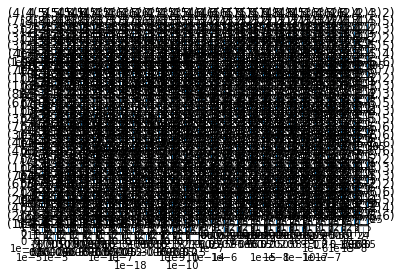

In [59]:
df.hist()

In [60]:
df.describe()

4                   5                              \
                  4         5         5                           6   
                  4         4         4                           4   
                  4         4         4             3             3   
count  2.000000e+00  2.000000  2.000000  2.000000e+00  2.000000e+00   
mean   2.125648e-07  0.066601  0.000008  4.063396e-09  9.797752e-09   
std    6.044403e-08  0.094185  0.000001  5.746487e-09  1.366846e-08   
min    1.698244e-07  0.000002  0.000007  1.627752e-14  1.326894e-10   
25%    1.911946e-07  0.033301  0.000008  2.031706e-09  4.965221e-09   
50%    2.125648e-07  0.066601  0.000008  4.063396e-09  9.797752e-09   
75%    2.339350e-07  0.099900  0.000009  6.095087e-09  1.463028e-08   
max    2.553052e-07  0.133200  0.000009  8.126777e-09  1.946281e-08   

                                                            6                \
                  4                           5             5             4   
                  4                           4             4             4   
                  3             2             2             3             3   
count  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
mean   1.568579e-08  5.227561e-13  1.199236e-12  1.376897e-04  4.800000e-01   
std    2.218306e-08  1.564085e-13  1.505097e-12  1.947083e-04  6.788225e-01   
min    1.194268e-15  4.121585e-13  1.349722e-13  1.007759e-08  2.594181e-09   
25%    7.842896e-09  4.674573e-13  6.671042e-13  6.884987e-05  2.400000e-01   
50%    1.568579e-08  5.227561e-13  1.199236e-12  1.376897e-04  4.800000e-01   
75%    2.352868e-08  5.780549e-13  1.731368e-12  2.065295e-04  7.200000e-01   
max    3.137158e-08  6.333536e-13  2.263500e-12  2.753693e-04  9.600000e-01   

       ...    2    1              5    1             8    7            \
       ...    2    3    2         4    2             5    5    4        
       ...    3    3    3         6    7             5    3    3        
       ...    5    5    5         4    6             3    4    4    5   
count  ...  2.0  2.0  2.0  2.000000  2.0  2.000000e+00  2.0  2.0  2.0   
mean   ...  0.0  0.0  0.0  0.001397  0.0  2.810769e-18  0.0  0.0  0.0   
std    ...  0.0  0.0  0.0  0.001976  0.0  1.219009e-18  0.0  0.0  0.0   
min    ...  0.0  0.0  0.0  0.000000  0.0  1.948800e-18  0.0  0.0  0.0   
25%    ...  0.0  0.0  0.0  0.000699  0.0  2.379785e-18  0.0  0.0  0.0   
50%    ...  0.0  0.0  0.0  0.001397  0.0  2.810769e-18  0.0  0.0  0.0   
75%    ...  0.0  0.0  0.0  0.002096  0.0  3.241754e-18  0.0  0.0  0.0   
max    ...  0.0  0.0  0.0  0.002794  0.0  3.672739e-18  0.0  0.0  0.0   

                     
                  5  
                  3  
                  5  
count  2.000000e+00  
mean   1.337068e-10  
std    1.890899e-10  
min    0.000000e+00  
25%    6.685338e-11  
50%    1.337068e-10  
75%    2.005602e-10  
max    2.674135e-10  

[8 rows x 689 columns]

In [61]:
df2 = df.T


0             1
4 4 4 4  1.698244e-07  2.553052e-07
  5 4 4  1.331998e-01  1.800424e-06
5 5 4 4  8.902510e-06  7.313159e-06
      3  8.126777e-09  1.627752e-14
  6 4 3  1.946281e-08  1.326894e-10
...               ...           ...
8 5 5 3  1.948800e-18  3.672739e-18
7 5 3 4  0.000000e+00  0.000000e+00
  4 3 4  0.000000e+00  0.000000e+00
      5  0.000000e+00  0.000000e+00
  5 3 5  0.000000e+00  2.674135e-10

[689 rows x 2 columns]

In [62]:
df2.describe()

,0,1
count,6.890000e+02,6.890000e+02
mean,2.903856e-02,2.899312e-02
std,1.464729e-01,1.462034e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.721642e-08,1.422128e-08
75%,8.323072e-05,1.099686e-04
max,1.110984e+00,1.069331e+00


In [84]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [74]:
df.mean()

4  4  4  4    2.125648e-07
   5  4  4    6.660082e-02
5  5  4  4    8.107834e-06
         3    4.063396e-09
   6  4  3    9.797752e-09
                  ...     
8  5  5  3    2.810769e-18
7  5  3  4    0.000000e+00
   4  3  4    0.000000e+00
         5    0.000000e+00
   5  3  5    1.337068e-10
Length: 689, dtype: float64